Saayed Alam  
Week 2 Part 1 Assignment: Graph Visualization   
DATA 620

In [32]:
# load libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

We load twitter dataset from [Stanford Large Network Dataset Collection](https://snap.stanford.edu/data/) consisting of 1.7 million twitter's list edges where node 1 follows node 2. We parse through the file using pandas library and load the dataset. 

In [33]:
# load data
twitter_df = pd.read_csv("https://github.com/saayedalam/Data/raw/master/twitter_combined.txt.gz",
                          compression = "gzip", sep = " ", header = None)

We sepearte the nodes and rename the columns. We also create a new column called *edges* using arbitrary sequential numbers. Next we subset the dataset where we select only the top 3 followed twitter lists and all the nodes that follow them with their respective edges.

In [34]:
# create and name 3 columns - nodes 1, nodes 2, edges
twitter_df.rename(columns = {0: "Nodes 1", 1: "Nodes 2"}, inplace = True)
twitter_df['Edges'] = range(1, len(twitter_df) + 1)
twitter_df['Edges'] = twitter_df['Edges'].astype(str)

# create a subset from the dataset
top_unique = dict(Counter(twitter_df["Nodes 2"]).most_common(3)).keys()
twitter_subset = twitter_df.loc[twitter_df["Nodes 2"].isin(list(top_unique))]
twitter_subset.head(10)

,Nodes 1,Nodes 2,Edges
45,324201646,40981798,46
61,107511013,22462180,62
77,35148062,43003845,78
80,57490887,40981798,81
98,221036078,22462180,99
130,6581292,40981798,131
132,116498875,22462180,133
149,292598082,22462180,150
156,163238842,43003845,157
170,260769396,22462180,171


Next we print basic info about the network graph. We also with the help of fucntions from networkx library analyze the twitter dataset using various metrics.

In [35]:
# load dataframe and draw the graph
G = nx.from_pandas_dataframe(twitter_subset, "Nodes 1", "Nodes 2", edge_attr = "Edges")
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3344
Number of edges: 8419
Average degree:   5.0353


* The *graph's diameter* is `3`. A graph's diameter is the largest number of lists that must be traversed in order to travel from one list to another.  
* A *degree centrality* is simply the number of followers a list has. The most followed list has `3216` followers. 
* The *closeness centrality* is the distance of nodes from one another others. This metric is for finding the lists who are best placed to influence the entire network most quickly. The list `43003845` is best placed to influence the entire network most quickly. 
* The *betweenness centrality* is for finding the node who influence the flow around a system. The list `43003845` is the top influencer. 

In [36]:
# graph's diameter
print(nx.diameter(G))

3


In [37]:
# degree centrality
deg = nx.degree(G)
max(dict(deg).values())

3216

In [38]:
# closeness centrality
close = nx.closeness_centrality(G)
close = sorted(close.items(), key = lambda kv: kv[1], reverse = True)
print(list(dict(close).keys())[1:10])

[43003845, 22462180, 324201646, 107511013, 57490887, 221036078, 6581292, 116498875, 292598082]


In [30]:
# betweenness centrality
bet = nx.betweenness_centrality(G)
bet = sorted(bet.items(), key = lambda kv: kv[1], reverse = True)
print(list(dict(bet).keys())[0:3])

[43003845, 22462180]


Finally, we visualize the graph and some of its metrics. 

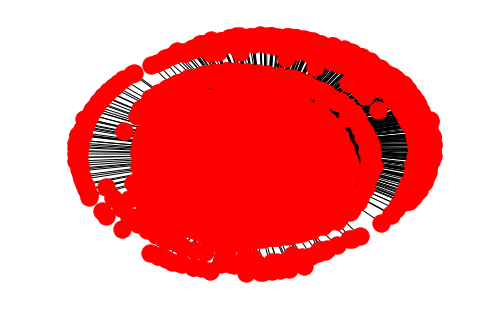

In [31]:
# visualize the graph
nx.draw(G, pos = nx.spring_layout(G))

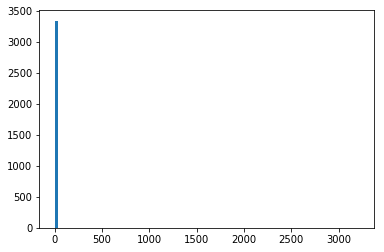

In [54]:
# visualize degree centrality
plt.hist(dict(deg).values(), 100) 
plt.show()